In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
res = pd.read_csv('H2HBABBA2753.csv')

In [3]:
res

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S llc,NaN,2020.0,1.930674e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,819.64,20200320.0,NAA8,1.930674e+09,1
1,U001,0200793513,KROGER us,NaN,2020.0,1.930823e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,NaN,2646.76,20200424.0,NAA8,1.930823e+09,1
2,U001,0200726979,BJ'S,2019-04-22 00:00:00,2019.0,1.929125e+09,2019-04-07,20190410,20190407,20190422.0,USD,RV,1.0,NaN,409.73,20190407.0,NAA8,1.929125e+09,0
3,U001,0200705089,JETR trust,2019-09-20 00:00:00,2019.0,1.929829e+09,2019-09-07,20190904,20190907,20190922.0,USD,RV,1.0,NaN,5781.95,20190907.0,NAA8,1.929829e+09,0
4,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930750e+09,2020-04-05,20200404,20200405,20200420.0,USD,RV,1.0,NaN,9358.29,20200405.0,NAH4,1.930750e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST trust,2019-08-29 00:00:00,2019.0,1.929732e+09,2019-08-12,20190810,20190812,20190827.0,USD,RV,1.0,NaN,20557.14,20190812.0,NAAX,1.929732e+09,0
49996,U001,0200794332,COST associates,2019-05-31 00:00:00,2019.0,1.929316e+09,2019-05-16,20190514,20190516,20190531.0,USD,RV,1.0,NaN,17809.30,20190516.0,NAAX,1.929316e+09,0
49997,U001,CCU013,KRAFT F in,2019-09-27 00:00:00,2019.0,1.929764e+09,2019-08-23,20190819,20190823,20190823.0,USD,RV,1.0,NaN,376.00,20190823.0,NAX2,1.929764e+09,0
49998,U001,200780383,MEIJ in,2019-08-20 00:00:00,2019.0,1.929702e+09,2019-08-05,20190804,20190805,20190820.0,USD,RV,1.0,NaN,112181.45,20190805.0,NAA8,1.929702e+09,0


In [4]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
res.nunique()

business_code                 6
cust_number                1391
name_customer              4116
clear_date                  395
buisness_year                 2
doc_id                    48775
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 552
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44140
baseline_create_date        509
cust_payment_terms           72
invoice_id                48770
isOpen                        2
dtype: int64

In [6]:
res.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.010779,0.976607,0.982650,0.989662,NaN,NaN,0.011313,0.982885,-0.009373,0.756729
doc_id,-0.010779,1.000000,-0.008008,-0.009866,-0.012365,NaN,NaN,0.175960,-0.007766,1.000000,-0.009962
document_create_date,0.976607,-0.008008,1.000000,0.993901,0.973413,NaN,NaN,0.012691,0.992953,-0.006386,0.767152
document_create_date.1,0.982650,-0.009866,0.993901,1.000000,0.978875,NaN,NaN,0.011839,0.999045,-0.008222,0.767260
due_in_date,0.989662,-0.012365,0.973413,0.978875,1.000000,NaN,NaN,0.011358,0.979746,-0.010760,0.757272
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.011313,0.175960,0.012691,0.011839,0.011358,NaN,NaN,1.000000,0.012372,0.183874,0.015258
baseline_create_date,0.982885,-0.007766,0.992953,0.999045,0.979746,NaN,NaN,0.012372,1.000000,-0.006046,0.766848
invoice_id,-0.009373,1.000000,-0.006386,-0.008222,-0.010760,NaN,NaN,0.183874,-0.006046,1.000000,-0.008963


In [7]:
res.drop(['buisness_year','document_create_date.1','invoice_id','isOpen','area_business','posting_id','baseline_create_date','document type'],axis=1,inplace=True)

In [8]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   doc_id                50000 non-null  float64
 5   posting_date          50000 non-null  object 
 6   document_create_date  50000 non-null  int64  
 7   due_in_date           50000 non-null  float64
 8   invoice_currency      50000 non-null  object 
 9   total_open_amount     50000 non-null  float64
 10  cust_payment_terms    50000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [9]:
res=res.drop_duplicates()#drop duplicate values

In [10]:
#to calculate delay we need to change dates in to data types

In [11]:
#res['due_in_date']=res['due_in_date'].astype(int)
res['clear_date'] = pd.to_datetime(res['clear_date'], format='%Y-%m-%d')
res['posting_date'] = pd.to_datetime(res['posting_date'], format='%Y-%m-%d')
res['due_in_date'] = pd.to_datetime(res['due_in_date'], format='%Y%m%d')
res['document_create_date'] = pd.to_datetime(res['document_create_date'], format='%Y%m%d')

In [12]:
res.sort_values('posting_date')

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
23430,U001,0200769623,WAL-MAR systems,2019-01-09,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,46142.53,NAH4
12511,U001,0200726979,BJ'S in,2019-01-15,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,58.18,NAA8
8956,U001,0200759878,SA,2019-01-15,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,13891.01,NAH4
7432,U001,0200726979,BJ'S us,2019-01-15,1.928537e+09,2018-12-30,2018-12-29,2019-01-14,USD,59.80,NAA8
47793,U001,0200769623,WAL-MAR,2019-01-09,1.928536e+09,2018-12-30,2018-12-29,2019-01-14,USD,15675.17,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
43109,U001,0200915438,GROC corp,NaT,1.930907e+09,2020-05-18,2020-05-16,2020-06-02,USD,9291.00,NAA8
5164,U001,200956366,RICH co,NaT,1.930902e+09,2020-05-18,2020-05-14,2020-06-02,USD,41540.40,NAA8
31358,CA02,0140105785,SHOPPE,NaT,2.960636e+09,2020-05-19,2020-05-19,2020-05-29,CAD,935.09,CA10
36425,U001,200956366,RICH systems,NaT,1.930910e+09,2020-05-21,2020-05-16,2020-06-05,USD,42360.00,NAA8


In [13]:
main_train = res[res.clear_date.isnull()==False]# this syntax stores all column values with no null values in clear_date in train data set
main_test = res[res.clear_date.isnull()] # it stores all column values with null in clear date in test set

In [14]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39078 entries, 2 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39078 non-null  object        
 1   cust_number           39078 non-null  object        
 2   name_customer         39078 non-null  object        
 3   clear_date            39078 non-null  datetime64[ns]
 4   doc_id                39078 non-null  float64       
 5   posting_date          39078 non-null  datetime64[ns]
 6   document_create_date  39078 non-null  datetime64[ns]
 7   due_in_date           39078 non-null  datetime64[ns]
 8   invoice_currency      39078 non-null  object        
 9   total_open_amount     39078 non-null  float64       
 10  cust_payment_terms    39078 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 3.6+ MB


In [15]:
#we need to calculate delay
main_train['delay'] = main_train['clear_date'] - main_train['due_in_date']

In [16]:
main_train['delay'] = pd.to_numeric(main_train['delay'].dt.days, downcast='integer')

In [17]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
2,U001,0200726979,BJ'S,2019-04-22,1.929125e+09,2019-04-07,2019-04-10,2019-04-22,USD,409.73,NAA8,0
3,U001,0200705089,JETR trust,2019-09-20,1.929829e+09,2019-09-07,2019-09-04,2019-09-22,USD,5781.95,NAA8,-2
5,U001,0200769623,WAL-MAR llc,2019-06-11,1.929404e+09,2019-05-30,2019-05-30,2019-06-14,USD,5824.36,NAH4,-3
6,CA02,0140106181,THE,2019-08-27,2.960552e+09,2019-06-17,2019-06-17,2019-06-29,CAD,18141.60,CA10,59
7,U001,0200769623,WAL-MAR us,2019-12-23,1.930264e+09,2019-12-11,2019-12-11,2019-12-26,USD,18196.52,NAH4,-3


# SPLIT DATA

In [18]:
X = main_train.drop('delay',axis=1)#it contains all data without target variable
y = main_train['delay']# contains only target variable

In [19]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39078 entries, 2 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39078 non-null  object        
 1   cust_number           39078 non-null  object        
 2   name_customer         39078 non-null  object        
 3   clear_date            39078 non-null  datetime64[ns]
 4   doc_id                39078 non-null  float64       
 5   posting_date          39078 non-null  datetime64[ns]
 6   document_create_date  39078 non-null  datetime64[ns]
 7   due_in_date           39078 non-null  datetime64[ns]
 8   invoice_currency      39078 non-null  object        
 9   total_open_amount     39078 non-null  float64       
 10  cust_payment_terms    39078 non-null  object        
 11  delay                 39078 non-null  int16         
dtypes: datetime64[ns](4), float64(2), int16(1), object(5)
memory usage: 3.7+ M

In [20]:
# splitting data in the form of validation set approach

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [22]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [23]:
X_train.shape,X_val.shape,X_test.shape

((27354, 11), (5862, 11), (5862, 11))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

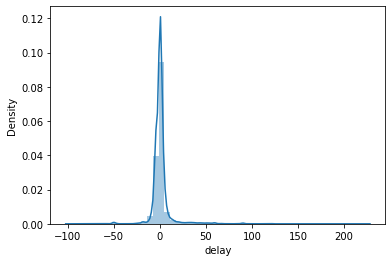

In [24]:
# distribution of the target column 
# it is somewhat symmetric skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

In [25]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
0,2,U001,0200726979,BJ'S,2019-04-22,1.929125e+09,2019-04-07,2019-04-10,2019-04-22,USD,409.73,NAA8,0
1,3,U001,0200705089,JETR trust,2019-09-20,1.929829e+09,2019-09-07,2019-09-04,2019-09-22,USD,5781.95,NAA8,-2
2,5,U001,0200769623,WAL-MAR llc,2019-06-11,1.929404e+09,2019-05-30,2019-05-30,2019-06-14,USD,5824.36,NAH4,-3
3,6,CA02,0140106181,THE,2019-08-27,2.960552e+09,2019-06-17,2019-06-17,2019-06-29,CAD,18141.60,CA10,59
4,7,U001,0200769623,WAL-MAR us,2019-12-23,1.930264e+09,2019-12-11,2019-12-11,2019-12-26,USD,18196.52,NAH4,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27349,34707,U001,CCU013,KRAFT F corporation,2019-06-28,1.929361e+09,2019-05-27,2019-05-23,2019-05-27,USD,274.80,NAX2,32
27350,34708,U013,0140103409,BUTTE llc,2019-08-30,1.991830e+09,2019-08-05,2019-08-01,2019-09-04,USD,1095.30,NAVE,-5
27351,34709,U001,0200769623,WAL-MAR trust,2019-03-13,1.928885e+09,2019-03-03,2019-03-02,2019-03-18,USD,16392.20,NAH4,-5
27352,34710,U001,0200707822,PUBLI corporation,2019-02-25,1.928740e+09,2019-02-08,2019-02-05,2019-02-23,USD,4727.23,NAA8,2


# FEATURE ENGINEERING

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27354 entries, 2 to 34711
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27354 non-null  object        
 1   cust_number           27354 non-null  object        
 2   name_customer         27354 non-null  object        
 3   clear_date            27354 non-null  datetime64[ns]
 4   doc_id                27354 non-null  float64       
 5   posting_date          27354 non-null  datetime64[ns]
 6   document_create_date  27354 non-null  datetime64[ns]
 7   due_in_date           27354 non-null  datetime64[ns]
 8   invoice_currency      27354 non-null  object        
 9   total_open_amount     27354 non-null  float64       
 10  cust_payment_terms    27354 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 2.5+ MB


In [27]:
#Now we have to do label encoding and that it converts to int so that the machine can learns only from it

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels= ['business_code','cust_number','name_customer','invoice_currency','cust_payment_terms']
def labelencoding(col):
    X_train[col]= labelencoder.fit_transform(X_train[col])
    X_test[col]= labelencoder.fit_transform(X_test[col])
    X_val[col]= labelencoder.fit_transform(X_test[col])
for _ in labels:
    labelencoding(_)

In [29]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
2,1,641,340,2019-04-22,1.929125e+09,2019-04-07,2019-04-10,2019-04-22,1,409.73,20
3,1,594,1509,2019-09-20,1.929829e+09,2019-09-07,2019-09-04,2019-09-22,1,5781.95,20
5,1,731,3186,2019-06-11,1.929404e+09,2019-05-30,2019-05-30,2019-06-14,1,5824.36,34
6,0,338,2975,2019-08-27,2.960552e+09,2019-06-17,2019-06-17,2019-06-29,0,18141.60,5
7,1,731,3189,2019-12-23,1.930264e+09,2019-12-11,2019-12-11,2019-12-26,1,18196.52,34


In [30]:
labels= ['doc_id','total_open_amount']
def labelencoding(col):
    X_train[col]= labelencoder.fit_transform(X_train[col])
    X_test[col]= labelencoder.fit_transform(X_test[col])
    X_val[col]= labelencoder.fit_transform(X_test[col])
for _ in labels:
    labelencoding(_)

In [31]:
del X_train['clear_date']
del X_val['clear_date']
del X_test['clear_date']

In [32]:
X_train['day'] = X_train['due_in_date'].dt.day
X_train['month'] = X_train['due_in_date'].dt.month
X_train['year'] = X_train['due_in_date'].dt.year

X_val['day'] = X_val['due_in_date'].dt.day
X_val['month'] = X_val['due_in_date'].dt.month
X_val['year'] = X_val['due_in_date'].dt.year


X_test['day'] = X_test['due_in_date'].dt.day
X_test['month'] = X_test['due_in_date'].dt.month
X_test['year'] = X_test['due_in_date'].dt.year

In [33]:
X_train['day'] = X_train['posting_date'].dt.day
X_train['month'] = X_train['posting_date'].dt.month
X_train['year'] = X_train['posting_date'].dt.year

X_val['day'] = X_val['posting_date'].dt.day
X_val['month'] = X_val['posting_date'].dt.month
X_val['year'] = X_val['posting_date'].dt.year


X_test['day'] = X_test['posting_date'].dt.day
X_test['month'] = X_test['posting_date'].dt.month
X_test['year'] = X_test['posting_date'].dt.year

In [34]:
X_train['day'] = X_train['document_create_date'].dt.day
X_train['month'] = X_train['document_create_date'].dt.month
X_train['year'] = X_train['document_create_date'].dt.year

X_val['day'] = X_val['document_create_date'].dt.day
X_val['month'] = X_val['document_create_date'].dt.month
X_val['year'] = X_val['document_create_date'].dt.year


X_test['day'] = X_test['document_create_date'].dt.day
X_test['month'] = X_test['document_create_date'].dt.month
X_test['year'] = X_test['document_create_date'].dt.year

In [35]:
X_train.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,day,month,year
2,1,641,340,6262,2019-04-07,2019-04-10,2019-04-22,1,1317,20,10,4,2019
3,1,594,1509,15293,2019-09-07,2019-09-04,2019-09-22,1,6395,20,4,9,2019
5,1,731,3186,9353,2019-05-30,2019-05-30,2019-06-14,1,6420,34,30,5,2019
6,0,338,2975,25982,2019-06-17,2019-06-17,2019-06-29,0,12201,5,17,6,2019
7,1,731,3189,21189,2019-12-11,2019-12-11,2019-12-26,1,12219,34,11,12,2019


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27354 entries, 2 to 34711
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27354 non-null  int32         
 1   cust_number           27354 non-null  int32         
 2   name_customer         27354 non-null  int32         
 3   doc_id                27354 non-null  int64         
 4   posting_date          27354 non-null  datetime64[ns]
 5   document_create_date  27354 non-null  datetime64[ns]
 6   due_in_date           27354 non-null  datetime64[ns]
 7   invoice_currency      27354 non-null  int32         
 8   total_open_amount     27354 non-null  int64         
 9   cust_payment_terms    27354 non-null  int32         
 10  day                   27354 non-null  int64         
 11  month                 27354 non-null  int64         
 12  year                  27354 non-null  int64         
dtypes: datetime64[ns

In [37]:
#convert datetime to int

In [38]:
X_train['posting_date'] = pd.to_datetime(X_train['posting_date']).astype(np.int64)
X_test['posting_date'] = pd.to_datetime(X_test['posting_date']).astype(np.int64)
X_val['posting_date'] = pd.to_datetime(X_val['posting_date']).astype(np.int64)

In [39]:
X_train['document_create_date'] = pd.to_datetime(X_train['document_create_date']).astype(np.int64)
X_test['document_create_date'] = pd.to_datetime(X_test['document_create_date']).astype(np.int64)
X_val['document_create_date'] = pd.to_datetime(X_val['document_create_date']).astype(np.int64)

In [40]:
X_train['due_in_date'] = pd.to_datetime(X_train['due_in_date']).astype(np.int64)
X_test['due_in_date'] = pd.to_datetime(X_test['due_in_date']).astype(np.int64)
X_val['due_in_date'] = pd.to_datetime(X_val['due_in_date']).astype(np.int64)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27354 entries, 2 to 34711
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   business_code         27354 non-null  int32
 1   cust_number           27354 non-null  int32
 2   name_customer         27354 non-null  int32
 3   doc_id                27354 non-null  int64
 4   posting_date          27354 non-null  int64
 5   document_create_date  27354 non-null  int64
 6   due_in_date           27354 non-null  int64
 7   invoice_currency      27354 non-null  int32
 8   total_open_amount     27354 non-null  int64
 9   cust_payment_terms    27354 non-null  int32
 10  day                   27354 non-null  int64
 11  month                 27354 non-null  int64
 12  year                  27354 non-null  int64
dtypes: int32(5), int64(8)
memory usage: 2.4 MB


# FEATURE SELECTION

<AxesSubplot:title={'center':'Persian Correlation'}>

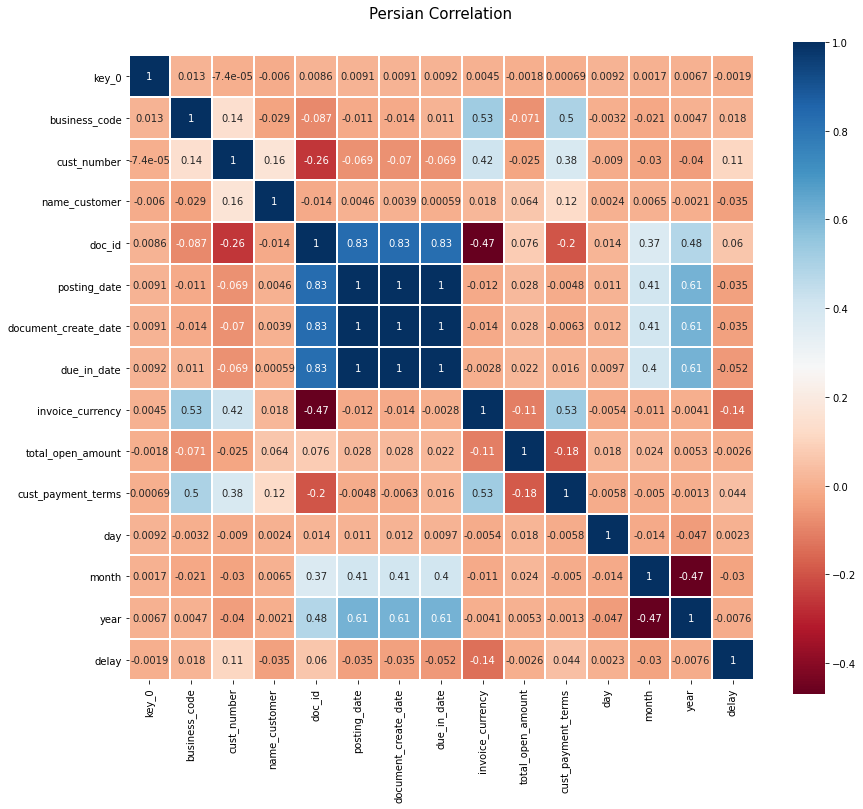

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Persian Correlation', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [43]:
# we can remove highly correlated columns

In [44]:
del X_train['doc_id']
del X_val['doc_id']
del X_test['doc_id']

# MODELLING

In [45]:
#Fitting the linear regression to train set
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_predict = base_model.predict(X_val)

In [47]:
y_val = y_val.astype('int64')

In [48]:
X_val = X_val.astype('int64')

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

10.41165715582011

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [51]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [52]:
y_predict2 = regressor.predict(X_val)

In [53]:
mean_squared_error(y_val, y_predict2, squared=False)

13.295477054730064

# MAIN TEST

In [54]:
main_test.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200726979,BJ'S llc,NaT,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,819.64,NAA8
1,U001,0200793513,KROGER us,NaT,1.930823e+09,2020-04-24,2020-04-24,2020-05-09,USD,2646.76,NAA8
4,U001,0200769623,WAL-MAR trust,NaT,1.930750e+09,2020-04-05,2020-04-04,2020-04-20,USD,9358.29,NAH4
9,U001,0200769623,WAL-MAR us,NaT,1.930739e+09,2020-04-04,2020-04-03,2020-04-19,USD,20233.36,NAH4
11,U001,200705742,DOT associates,NaT,1.930854e+09,2020-05-02,2020-05-03,2020-06-05,USD,3603.99,NAAW


In [55]:
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test
main_test.drop(['clear_date'], inplace =True,axis=1)

# FEATURE ENGINEERING

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels= ['business_code','cust_number','name_customer','invoice_currency','cust_payment_terms']
def labelencoding(col):
    main_test[col]= labelencoder.fit_transform(main_test[col])
for _ in labels:
    labelencoding(_)

In [57]:
main_test.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,1,329,192,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,1,819.64,13
1,1,456,892,1.930823e+09,2020-04-24,2020-04-24,2020-05-09,1,2646.76,13
4,1,405,1680,1.930750e+09,2020-04-05,2020-04-04,2020-04-20,1,9358.29,28
9,1,405,1681,1.930739e+09,2020-04-04,2020-04-03,2020-04-19,1,20233.36,28
11,1,577,467,1.930854e+09,2020-05-02,2020-05-03,2020-06-05,1,3603.99,14


In [58]:
labels= ['doc_id','total_open_amount']
def labelencoding(col):
    main_test[col]= labelencoder.fit_transform(main_test[col])
for _ in labels:
    labelencoding(_)

In [59]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9697 entries, 0 to 49993
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9697 non-null   int32         
 1   cust_number           9697 non-null   int32         
 2   name_customer         9697 non-null   int32         
 3   doc_id                9697 non-null   int64         
 4   posting_date          9697 non-null   datetime64[ns]
 5   document_create_date  9697 non-null   datetime64[ns]
 6   due_in_date           9697 non-null   datetime64[ns]
 7   invoice_currency      9697 non-null   int32         
 8   total_open_amount     9697 non-null   int64         
 9   cust_payment_terms    9697 non-null   int32         
dtypes: datetime64[ns](3), int32(5), int64(2)
memory usage: 643.9 KB


In [60]:
main_test['day'] = main_test['due_in_date'].dt.day
main_test['month'] =main_test['due_in_date'].dt.month
main_test['year'] =main_test['due_in_date'].dt.year

In [61]:
main_test['day'] = main_test['posting_date'].dt.day
main_test['month'] =main_test['posting_date'].dt.month
main_test['year'] =main_test['posting_date'].dt.year

In [62]:
# main_test['day'] = main_test['posting_date'].dt.day
main_test['month'] =main_test['posting_date'].dt.month
main_test['year'] =main_test['posting_date'].dt.year

In [63]:
main_test['posting_date'] = pd.to_datetime(main_test['posting_date']).astype(np.int64)

In [64]:
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date']).astype(np.int64)

In [65]:
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date']).astype(np.int64)

In [66]:
 del main_test['doc_id']

In [67]:
main_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'posting_date',
       'document_create_date', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms', 'day', 'month', 'year'],
      dtype='object')

In [68]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'posting_date',
       'document_create_date', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms', 'day', 'month', 'year'],
      dtype='object')

# FINAL OUTCOME

In [69]:
#Predicting 
output = regressor.predict(main_test)

In [70]:
output = pd.Series(output,name='delay')

In [71]:
X_main_test.reset_index(drop=True,inplace=True)

In [72]:
final_output = X_main_test.merge(output , on= main_test.index )
final_output['delay']=final_output['delay'].apply(np.ceil)
final_output['delay']=final_output['delay'].astype(int)

In [73]:
final_output['delay'].unique()

array([  1,   4, -31,  53,   8,  -1,  -8, -84])

In [74]:
final_output['clear_date']=final_output['due_in_date']+final_output['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))

In [75]:
#Delay <=0 : bucket 1
#Delay 0 to 10: bucket 2
#Delay >10: bucket 3

In [76]:
bins= [-50,0,10,30] # range of the delay
labels = ['bucket_1','bucket_2','bucket_3'] 
final_output['Bucket'] = pd.cut(final_output['delay'], bins=bins, labels=labels, right=False)

In [77]:
final_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9697 entries, 0 to 9696
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 9697 non-null   int64         
 1   business_code         9697 non-null   object        
 2   cust_number           9697 non-null   object        
 3   name_customer         9697 non-null   object        
 4   doc_id                9697 non-null   float64       
 5   posting_date          9697 non-null   datetime64[ns]
 6   document_create_date  9697 non-null   datetime64[ns]
 7   due_in_date           9697 non-null   datetime64[ns]
 8   invoice_currency      9697 non-null   object        
 9   total_open_amount     9697 non-null   float64       
 10  cust_payment_terms    9697 non-null   object        
 11  delay                 9697 non-null   int32         
 12  clear_date            9697 non-null   datetime64[ns]
 13  Bucket            

In [78]:
final_output.head(100)

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay,clear_date,Bucket
0,0,U001,0200726979,BJ'S llc,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,819.64,NAA8,1,2020-04-05,bucket_2
1,1,U001,0200793513,KROGER us,1.930823e+09,2020-04-24,2020-04-24,2020-05-09,USD,2646.76,NAA8,1,2020-05-10,bucket_2
2,4,U001,0200769623,WAL-MAR trust,1.930750e+09,2020-04-05,2020-04-04,2020-04-20,USD,9358.29,NAH4,1,2020-04-21,bucket_2
3,9,U001,0200769623,WAL-MAR us,1.930739e+09,2020-04-04,2020-04-03,2020-04-19,USD,20233.36,NAH4,1,2020-04-20,bucket_2
4,11,U001,200705742,DOT associates,1.930854e+09,2020-05-02,2020-05-03,2020-06-05,USD,3603.99,NAAW,1,2020-06-06,bucket_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,443,U001,200769623,WAL-MAR corporation,1.930739e+09,2020-04-02,2020-04-03,2020-04-17,USD,76678.84,NAH4,1,2020-04-18,bucket_2
96,447,U001,200705089,JETR corporation,1.930873e+09,2020-05-08,2020-05-07,2020-05-23,USD,9309.82,NAA8,1,2020-05-24,bucket_2
97,452,U001,0200769623,WAL-MAR systems,1.930598e+09,2020-03-03,2020-03-04,2020-03-18,USD,59456.05,NAH4,1,2020-03-19,bucket_2
98,457,U001,0200943275,US corp,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,5009.47,NAA8,1,2020-05-03,bucket_2


In [79]:
final_output.to_csv(r'C:\Users\HP\Desktop\MILE STONE\main_test.csv')